# Démo 10 : Réseaux de neurones

Dans ce TP nous allons découvrir une bibliothèque qui permet de construire des réseaux de neurones. Il s'agit de **Keras**. **Contrairement à ce qui est demandé dans le devoir 2**, ici le gros du travail sera effectué par Keras, c'est à dire qu'on n'aura pas besoin d'écrire explicitement les équations de rétropropagation du gradient.

Tout d'abord, vérifiez que Keras est installé sur votre ordinateur en exécutant la cellule suivante :

In [1]:
import keras

Using Theano backend.


Comme d'habitude on a aussi besoin de numpy, matplotlib et sklearn.

In [2]:
import sklearn
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets
from keras.utils.np_utils import to_categorical

iris = datasets.load_iris()

np.random.seed(0)
indices = np.random.permutation(len(iris.target))
iris_train_x = iris.data[indices[:90]]
iris_valid_x = iris.data[indices[90:120]]
iris_test_x = iris.data[indices[120:]]

# pour les valeurs des cibles, on va utiliser la fonction
# to_categorical de keras qui retourne les variables sous forme
# one_hot
iris_train_y = to_categorical(iris.target[indices[:90]], 3)
iris_valid_y = to_categorical(iris.target[indices[90:120]], 3)
iris_test_y = to_categorical(iris.target[indices[120:]], 3)

## Premiers pas avec Keras

Pour illustrer le fonctionnement de Keras, on va de nouveau utiliser les données Iris. La tache qui nous intéresse est la classification en fonction des traits caractéristiques des fleurs.

Tout d'abord on va construire un réseau de neurones tout simple avec :
 - une couche d'entrée (dimension 4 = le nombre de traits caractéristiques)
 - une couche cachée (dimension 5)
 - une couche de sortie (dimension 3 = le nombre de classes)
 
On va utiliser des non-linéarités sigmoid. Voici comment s'implémente un tel réseau avec Keras:

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import backend as K
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(5, input_dim=4))
model.add(Activation('sigmoid'))
model.add(Dense(3))
model.add(Activation('sigmoid'))

sgd = SGD(0.1)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

On peut afficher les dimensions des paramètres et appliquer notre réseau à un exemple de test pour se convaincre qu'il fait bien ce qu'on lui demande:

In [5]:
for p in model.get_weights():
    print(p.shape)

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-5-18f96b77884b>, line 2)

In [9]:
# notre exemple de test
x = iris_test_x[1:2,:]
y = iris_test_y[1:2,:]

print('vecteur de probabilités:', model.predict(iris_test_x[1:2,:], verbose=False))
print('classe prédite:', model.predict_classes(iris_test_x[1:2,:], verbose=False))
print('classe réelle:', y.argmax(axis=1))

vecteur de probabilités: [[ 0.51216829  0.75854349  0.2351082 ]]
classe prédite: [1]
classe réelle: [2]


### Apprentissage des paramètres

Maintenant on a un réseau avec ses paramètres (les poids W et les biais b), il ne nous reste plus qu'à l'entrainer.

C'est à dire qu'on va effectuer une descente de gradient sur des mini batch de nos données d'entrainement. Comme on a déjà préparé les paramètres de notre modèle, c'est Keras qui s'occupe de la partie descente de gradient, et donc cela tient en une ligne:

In [10]:
logs = model.fit(iris_train_x, iris_train_y, nb_epoch=100,
                 validation_data=(iris_valid_x, iris_valid_y))

Train on 90 samples, validate on 30 samples
Epoch 1/100
90/90 [==============================] - 0s - loss: 1.2144 - acc: 0.3667 - val_loss: 1.2778 - val_acc: 0.2000
Epoch 2/100
90/90 [==============================] - 0s - loss: 1.1899 - acc: 0.3667 - val_loss: 1.2582 - val_acc: 0.2000
Epoch 3/100
90/90 [==============================] - 0s - loss: 1.1705 - acc: 0.3667 - val_loss: 1.2442 - val_acc: 0.2000
Epoch 4/100
90/90 [==============================] - 0s - loss: 1.1566 - acc: 0.3667 - val_loss: 1.2335 - val_acc: 0.2000
Epoch 5/100
90/90 [==============================] - 0s - loss: 1.1465 - acc: 0.3667 - val_loss: 1.2239 - val_acc: 0.2000
Epoch 6/100
90/90 [==============================] - 0s - loss: 1.1389 - acc: 0.3667 - val_loss: 1.2163 - val_acc: 0.2000
Epoch 7/100
90/90 [==============================] - 0s - loss: 1.1327 - acc: 0.3667 - val_loss: 1.2094 - val_acc: 0.2000
Epoch 8/100
90/90 [==============================] - 0s - loss: 1.1278 - acc: 0.3667 - val_loss: 1.203

90/90 [==============================] - 0s - loss: 1.0157 - acc: 0.6556 - val_loss: 1.0423 - val_acc: 0.5333
Epoch 68/100
90/90 [==============================] - 0s - loss: 1.0132 - acc: 0.6889 - val_loss: 1.0394 - val_acc: 0.5333
Epoch 69/100
90/90 [==============================] - 0s - loss: 1.0109 - acc: 0.6889 - val_loss: 1.0367 - val_acc: 0.5333
Epoch 70/100
90/90 [==============================] - 0s - loss: 1.0082 - acc: 0.6889 - val_loss: 1.0336 - val_acc: 0.5000
Epoch 71/100
90/90 [==============================] - 0s - loss: 1.0060 - acc: 0.6889 - val_loss: 1.0307 - val_acc: 0.5000
Epoch 72/100
90/90 [==============================] - 0s - loss: 1.0026 - acc: 0.6111 - val_loss: 1.0271 - val_acc: 0.5000
Epoch 73/100
90/90 [==============================] - 0s - loss: 1.0000 - acc: 0.5889 - val_loss: 1.0237 - val_acc: 0.5000
Epoch 74/100
90/90 [==============================] - 0s - loss: 0.9976 - acc: 0.6111 - val_loss: 1.0196 - val_acc: 0.5000
Epoch 75/100
90/90 [=========

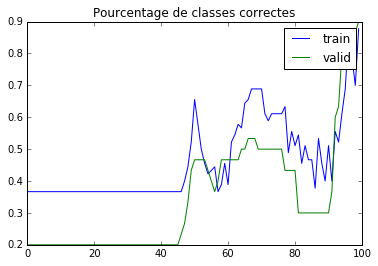

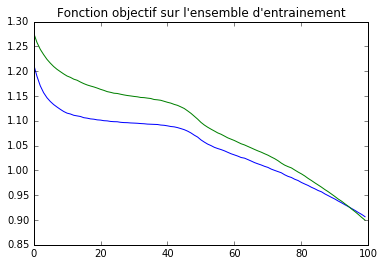

In [11]:
plt.plot(logs.history['acc'], label='train')
plt.plot(logs.history['val_acc'], label='valid')
plt.legend()
plt.title('Pourcentage de classes correctes')
plt.show()
plt.plot(logs.history['loss'], label='train')
plt.plot(logs.history['val_loss'], label='valid')
plt.title('Fonction objectif sur l\'ensemble d\'entrainement')
plt.show()

## Différentiation automatique

Pour bien comprendre la puissance de Keras (et des bibliothèques qui sont cachées derrière Keras, soit par exemple Theano développé ici même au laboratoire MILA), dans cette partie on va vérifier les gradients calculés.

La cellule qui suit n'est pas au programme, il n'est pas nécessaire de comprendre les détails.

Ce qui nous intéresse ici c'est qu'on y créé une fonction `compute_grad_w1` qui va nous donner le gradient de la fonction objectif par rapport à la matrice de poids w1. Contrairement à ce qui est demandé dans le devoir où on effectue la rétropropagation du gradient étape par étape jusqu'à arriver à la matrice w1, ici c'est le modèle qui s'en charge. Sans même comprendre les détails de ce qui est effectué dans la cellule, ce qui est remarquable c'est qu'il n'y a nulle part de dérivée explicite ou de multiplication matrice/vecteur.

In [12]:
loss_sym = model.model.loss_functions[0](model.outputs[0], model.model.targets[0]).mean()
w1 = model.layers[0].W
grad_w1_sym = K.gradients(loss_sym, w1)
compute_grad_w1 = K.function([model.inputs[0], model.model.targets[0]], grad_w1_sym)
compute_loss = K.function([model.inputs[0], model.model.targets[0]], loss_sym)

In [14]:
# exemple d'utilisation :
grad_w1 = compute_grad_w1([x, y])
print(grad_w1.shape)
print(grad_w1)

(4, 5)
[[ -7.91105688e-01  -4.07659709e-01   5.02983332e-01  -2.27029696e-01
   -1.88899867e-04]
 [ -2.87674814e-01  -1.48239896e-01   1.82903022e-01  -8.25562552e-02
   -6.86908606e-05]
 [ -6.88364685e-01  -3.54716897e-01   4.37660813e-01  -1.97545320e-01
   -1.64367404e-04]
 [ -2.05482006e-01  -1.05885640e-01   1.30645022e-01  -5.89687526e-02
   -4.90648999e-05]]


## Vérification du gradient par différences finies

On va maintenant vérifier que le gradient calculé par Keras est juste. Pour cela on va calculer une approximation du gradient en utilisant la méthode de la différence finie.

Pour chaque composante de w1, on va:
 1. calculer la valeur de la fonction objectif $L$
 2. ajouter une petite valeur $\epsilon$ à la composante
 3. recalculer la valeur de la fonction objectif $L'$
 4. remettre à l'ancienne valeur la composante (c'est à dire soustraire $\epsilon$)

Le gradient par différences finies sera dans ce cas donné par:
$\Big( \frac{\partial L}{\partial W_{1}} \Big)_{ij} = \frac{1}{\epsilon} (L' - L)$

In [15]:
grad_w1_diff = np.zeros((4, 5))

epsilon = 1e-3
L = compute_loss([x, y])

for i in range(4):
    for j in range(5):
        w1_val = w1.get_value()
        w1_val[i, j] += epsilon
        w1.set_value(w1_val)
        L_prime = compute_loss([x, y])
        w1_val[i, j] -= epsilon
        w1.set_value(w1_val)

        grad_w1_diff[i, j] = (L_prime - L) / epsilon

In [17]:
print(grad_w1_diff)
print(grad_w1/grad_w1_diff)

[[-0.78868866 -0.40912628  0.50449371 -0.22792816 -0.00095367]
 [-0.28800964 -0.14877319  0.18215179 -0.08296967 -0.00095367]
 [-0.68664551 -0.35572052  0.43773651 -0.19931793 -0.00095367]
 [-0.20599365 -0.10681152  0.12969971 -0.06008148 -0.00095367]]
[[ 1.00306462  0.99641536  0.99700614  0.99605812  0.19807587]
 [ 0.99883744  0.99641536  1.00412418  0.99501733  0.07202759]
 [ 1.00250373  0.99717862  0.99982707  0.99110661  0.17235172]
 [ 0.9975162   0.99133161  1.00728849  0.98147966  0.05144828]]


## Apprentissage d'un réseaux de neurones pour de la classification d'images de chiffres

Dans la suite on va utiliser des données plus difficiles à classifier que iris, il s'agit d'images des chiffres de 0 à 9. Exécutez la cellule suivante pour charger les données et afficher un exemplaire:

In [ ]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('mnist-original', data_home='/u/dift3395/sklearn_data')

plt.imshow(mnist.data[21455,:].reshape(28, 28), interpolation="nearest", cmap='Greys')

On va effectuer la séparation train/valid/set comme d'habitude

In [ ]:
np.random.seed(0)
indices = np.random.permutation(len(mnist['target']))

print mnist['data'].shape

X_train = mnist['data'][indices][:50000]/255.
X_valid = mnist['data'][indices][50000:60000]/255.
X_test = mnist['data'][indices][60000:]/255.
y_train = mnist['target'][indices][:50000]
y_valid = mnist['target'][indices][50000:60000]
y_test = mnist['target'][indices][60000:]

from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_valid = np_utils.to_categorical(y_valid)
y_test = np_utils.to_categorical(y_test)

print y_train.shape

En utilisant l'exemple vu précédemment, c'est maintenant à vous d'implémenter un réseau de neurones pour classifier les données MNIST. 

Vous pouvez utiliser différentes fonctions d'activation parmi
 - `Activation('relu')`
 - `Activation('sigmoid')`
 - `Activation('tanh')`
 - `Activation('softmax')`
 
Vous pouvez ajouter de la régularisation sur les poids de cette manière:

    from keras.regularizers import l2
    model.add(Dense(64, input_dim=64, W_regularizer=l2(0.01)))
  
Vous pouvez ajouter des couches et modifier leur taille.

Vous pouvez également jouer sur la taille des mini-batches et sur le taux d'apprentissage (learning rate).

Notez vos meilleurs hyperparamètres, ils pourront vous être utile pour le devoir !

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(64, input_dim=28*28, init='uniform'))
model.add(Activation('relu'))
model.add(Dense(64, init='uniform'))
model.add(Activation('relu'))
model.add(Dense(10, init='uniform'))
model.add(Activation('softmax'))

sgd = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

logs = model.fit(X_train, y_train,
          nb_epoch=10,
          batch_size=16,
          validation_data=(X_valid, y_valid))

score = model.evaluate(X_test, y_test, batch_size=16)
print '\nRésultats:'
print 'Train: Taux d\'erreur: %f %%, loss: %f' % ((1-logs.history['acc'][-1])*100, logs.history['loss'][-1])
print 'Valid: Taux d\'erreur: %f %%, loss: %f' % ((1-logs.history['val_acc'][-1])*100, logs.history['val_loss'][-1])
print 'Test: Taux d\'erreur: %f %%, loss: %f' % ((1-score[1])*100, score[0])